In [1]:
# import the important packages
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
#from sklearn.preprocessing import StandardScale
import os

In [2]:
# define functions

# reads data from an xml-file
def read_data(file):
    with open(file, 'r') as f:
        data = f.read() 
    bs_data = bs(data, 'xml') 
    return bs_data

# abstract out the calculation for euclidian distances
def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    # print(a1)
    return r

# calculates distance based on data, returns a dataframe
def calc_euclidian_distances(bs_data, low, high):
    b_name = bs_data.find_all('name')

    attributes = []
    # finds all values 
    for i in range(len(b_name)):
        attributes.append(b_name[i].get('value'))

    attributes = list(attributes)
    collection = {}
    #print(attributes)
    
    # finds x-, y- and z-values and computes euclidian distance
    # for first values
    for i in range(low, high):
        r = calc(b_name, i)
        collection[attributes[i]] = r

    df = pd.DataFrame(collection)
    return df

In [3]:
healthy_list = []
path = "../usethis/HEALTHY/"
for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            healthy_list.append(df1)
        except:
            print(xml_file + " failed to compute")

pfps_list = []
path = "../usethis/PFPS/"
for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            pfps_list.append(df1)
        except:
            print(xml_file + " failed to compute")

            

timeseries-10.xml failed to compute
timeseries-44.xml failed to compute


Text(0, 0.5, 'Lefts')

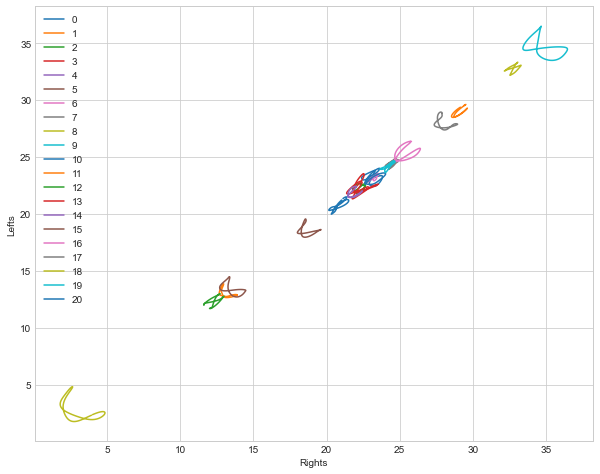

In [4]:
plt.figure(figsize = (10,8))
index = 0

for person in healthy_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

Text(0, 0.5, 'Lefts')

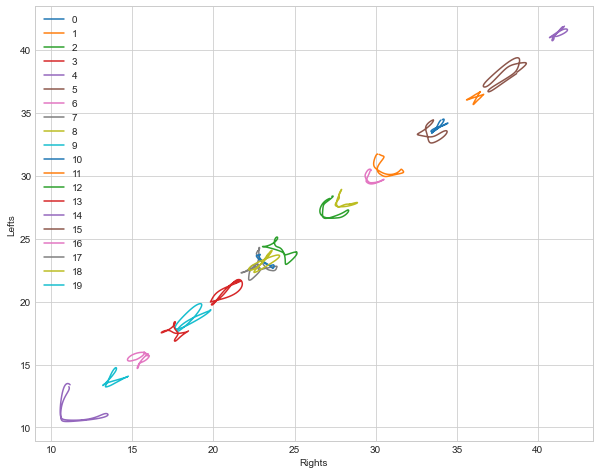

In [5]:
plt.figure(figsize = (10,8))
index = 0

for person in pfps_list:
    try: 
        plt.plot(person['Right Pelvic Angles'], person['Left Pelvic Angles'], label = index)
    except: 
        print("fail :(")
    index += 1
plt.legend()
plt.xlabel('Rights')
plt.ylabel('Lefts')

In [6]:
# mean
i = 0
df_list = []
injurylevel = [0 for i in range(21)]
df = pd.DataFrame(injurylevel, columns=['injury level'])
path = "../usethis/HEALTHY/"
injury = pd.DataFrame(injurylevel, columns=['injury level'])



for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            #df1 = df1.join(injury)
            #print(df1)

            df_list.append(df1)
            i += 1
        except:
            print(xml_file + " failed to compute")

data = pd.concat(df_list)
#df2 = data.join(df)

print(f"Length of calculated dataframe: {len(data)}" )
print(f"Length of how many timeseries-files we have: {i}")

timeseries-10.xml failed to compute
timeseries-44.xml failed to compute
Length of calculated dataframe: 21
Length of how many timeseries-files we have: 21


In [7]:
df_list = []
injurylevel = [1 for i in range(20)]
injurylevel2 = [0 for i in range(21)]
injury = pd.DataFrame([1], columns=['injury level'])
#print(injurylevel)
injury = injurylevel2.append(injurylevel)

df = pd.DataFrame(injurylevel, columns=['injury level'])
path = "../usethis/PFPS/"
n = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            df1 = pd.DataFrame(df1.mean().to_dict(),index=[df1.index.values[-1]])
            #print(df1)
            #break
            df1 = df1.rename(index={100:i})
            #df1 = df1.join(injury)


            df_list.append(df1)
            i += 1
            n += 1
        except:
            print(xml_file + " failed to compute")

data2 = pd.concat(df_list)
#df3 = data.join(df)
total = i - n

print(f"Length of calculated dataframe: {len(data)}" )
print(f"Length of how many timeseries-files we have: {total}")

Length of calculated dataframe: 21
Length of how many timeseries-files we have: 21


In [8]:
# injured = 1, uninjured = 0
injurylevel = [1 for i in range(20)]
injurylevel2 = [0 for i in range(21)]
injury = injurylevel2 + injurylevel

injury = pd.DataFrame(injury, columns=['injury level'])
data3 = data.append(data2)
data4 = data3.join(injury)
data4

,Head Angles,L_FCC_VLab,L_FM2_VLab,Left Ankle Angles,Left Foot Contact Angle,Left Foot Progression,Left Hip Angles,Left Knee Angles,Left Pelvic Angles,Left Shoulder Angles,...,Right Knee Angles,Right Pelvic Angles,Right Shoulder Angles,Right Shoulder_Pelvis Angle,Right Wrist Angles,Right_Knee_Ankle_distance,Right_Knee_VLab,Trunk Angles,Trunk Angles_wrt_LAB,injury level
0,35.862844,85.902715,76.145466,14.417121,28.989136,28.989136,69.417308,76.952779,23.166410,70.577348,...,77.542576,23.113938,63.794515,11.806194,24.369548,40.076506,41.597866,25.553921,48.466655,0
1,51.940885,86.520692,75.737934,20.591824,25.088395,25.088395,69.065276,67.767056,29.013558,92.517481,...,67.375267,29.113850,88.598400,9.492683,36.749846,43.514267,38.057626,33.461618,62.450300,0
2,52.652867,87.202825,76.530879,7.460664,24.637568,24.637568,67.770082,71.499201,22.252603,80.801702,...,73.598612,22.230706,82.334341,6.248487,33.182902,45.521628,35.635188,30.612819,52.378198,0
3,47.793870,76.171308,66.542881,12.951457,35.398566,35.398566,64.739569,80.167860,22.190777,85.413668,...,81.591355,22.214431,78.594444,4.060066,43.307991,36.213599,31.623101,38.576006,60.359592,0
4,44.931789,79.680261,71.636891,14.261913,37.509368,37.509368,70.692397,75.427199,23.166557,81.602113,...,76.116473,23.124950,83.917632,26.040101,23.011703,40.911431,34.330867,25.550287,NaN,0
5,26.051306,84.501617,73.988494,12.137177,24.842388,24.842388,66.264674,74.125489,18.667810,96.582409,...,74.779176,18.688015,90.242213,15.650085,37.253939,41.060101,39.619741,30.981455,49.056342,0
6,78.480714,90.797609,80.813721,16.497689,27.180673,27.180673,68.564674,74.153022,23.330814,90.932246,...,74.582458,23.341459,87.801950,31.423540,34.349971,45.104773,41.652996,29.017715,52.002930,0
7,33.279479,89.884093,76.206056,9.519665,24.285170,24.285170,71.033814,73.150243,24.471191,87.565423,...,73.734703,24.509791,74.900503,12.929479,17.265198,43.590940,42.111381,34.396227,58.719753,0
8,55.158103,83.293229,79.136342,9.266837,31.231511,31.231511,49.755023,73.992013,2.971722,80.946712,...,74.561679,2.977401,80.337131,16.549794,39.918400,43.857239,35.170004,51.061656,50.157052,0
9,64.753342,91.033232,79.260433,8.595935,22.092963,22.092963,73.298021,64.275354,34.832475,83.547150,...,70.091538,34.787837,79.282735,6.991826,27.482044,41.493335,43.385215,29.796965,63.318729,0


Text(0.5, 1.0, 'Left Knee Angles')

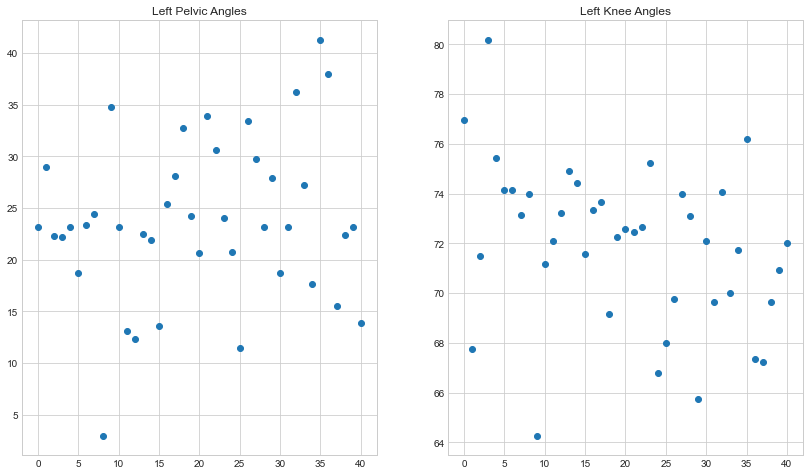

In [9]:
fig,ax = plt.subplots(1,2,figsize = (14,8))
#, c=data4["injury level"]
ax[0].scatter(np.arange(0,41),data4["Left Pelvic Angles"])
ax[0].set_title("Left Pelvic Angles")

ax[1].scatter(np.arange(0,41),data4["Left Knee Angles"])
ax[1].set_title("Left Knee Angles")

In [26]:
# standard deviation
i = 0
df_list = []
injurylevel = [0 for i in range(21)]
df = pd.DataFrame(injurylevel, columns=['injury level'])
path = "../usethis/HEALTHY/"
injury = pd.DataFrame(injurylevel, columns=['injury level'])



for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            df1 = pd.DataFrame(df1.std().to_dict(),index=[df1.index.values[-1]])
            df1 = df1.rename(index={100:i})
            #df1 = df1.join(injury)
            #print(df1)

            df_list.append(df1)
            i += 1
        except:
            print(xml_file + " failed to compute")

data = pd.concat(df_list)
#df2 = data.join(df)

print(f"Length of calculated dataframe: {len(data)}" )
print(f"Length of how many timeseries-files we have: {i}")

df_list = []
injurylevel = [1 for i in range(20)]
injurylevel2 = [0 for i in range(21)]
injury = pd.DataFrame([1], columns=['injury level'])
#print(injurylevel)
injury = injurylevel2.append(injurylevel)

df = pd.DataFrame(injurylevel, columns=['injury level'])
path = "../usethis/PFPS/"
n = 0

for xml_file in os.listdir(path):
    if xml_file.startswith("timeseries"):
        #print(xml_file)
        bs_data = read_data(path + xml_file)
        b_name = bs_data.find_all('name')
        try:
            df1 = calc_euclidian_distances(bs_data, 0, int(len(b_name)/4))
            df1 = pd.DataFrame(df1.std().to_dict(),index=[df1.index.values[-1]])
            #print(df1)
            #break
            df1 = df1.rename(index={100:i})
            #df1 = df1.join(injury)


            df_list.append(df1)
            i += 1
            n += 1
        except:
            print(xml_file + " failed to compute")

data2 = pd.concat(df_list)
#df3 = data.join(df)
total = i - n

print(f"Length of calculated dataframe: {len(data)}" )
print(f"Length of how many timeseries-files we have: {total}")

# injured = 1, uninjured = 0
injurylevel = [1 for i in range(20)]
injurylevel2 = [0 for i in range(21)]
injurylevel = injurylevel2 + injurylevel

injury = pd.DataFrame(injury, columns=['injury level'])
data3 = data.append(data2)
data4 = data3.join(injury)
data4

timeseries-10.xml failed to compute
timeseries-44.xml failed to compute
Length of calculated dataframe: 21
Length of how many timeseries-files we have: 21
Length of calculated dataframe: 21
Length of how many timeseries-files we have: 21


,Head Angles,L_FCC_VLab,L_FM2_VLab,Left Ankle Angles,Left Foot Contact Angle,Left Foot Progression,Left Hip Angles,Left Knee Angles,Left Pelvic Angles,Left Shoulder Angles,...,Right Knee Angles,Right Pelvic Angles,Right Shoulder Angles,Right Shoulder_Pelvis Angle,Right Wrist Angles,Right_Knee_Ankle_distance,Right_Knee_VLab,Trunk Angles,Trunk Angles_wrt_LAB,injury level
0,0.324283,9.002969,12.040233,4.580503,20.696051,20.696051,16.862139,28.376743,0.406218,0.609478,...,28.425803,0.405136,0.298958,0.585984,0.763128,0.004833,8.924361,0.476153,0.212321,NaN
1,0.167669,10.120630,12.127279,1.997939,15.554807,15.554807,15.232855,25.453415,0.351931,0.476635,...,25.983575,0.343115,0.790564,0.445387,0.157412,0.003016,9.825591,0.497190,0.287186,NaN
2,0.370349,11.401768,12.226943,4.255157,16.307429,16.307429,15.966834,25.782462,0.284346,0.523693,...,25.557198,0.274024,0.475670,1.303566,0.222915,0.000248,11.002402,0.505145,0.175689,NaN
3,0.446813,11.028414,12.069680,1.522730,15.969752,15.969752,17.105359,27.954293,0.450980,0.373908,...,26.995191,0.453470,0.616022,1.335530,0.448467,0.000464,10.387977,0.688156,0.263856,NaN
4,0.293114,9.479003,12.411256,7.177958,15.498513,15.498513,14.990877,24.825794,0.230118,0.283279,...,24.848252,0.230942,0.784302,0.389713,0.180866,0.000246,8.410255,0.366377,NaN,NaN
5,0.386515,11.413418,12.098431,2.356985,14.877805,14.877805,18.982487,30.083191,0.476446,0.702704,...,29.688050,0.493495,0.451561,0.565862,0.266508,0.000785,9.731782,0.541881,0.283209,NaN
6,0.657140,11.055899,12.160408,1.221723,14.605920,14.605920,15.655703,23.710141,0.177148,0.754147,...,23.004086,0.174032,0.565160,0.475070,0.394553,0.002837,10.351453,0.333042,0.334595,NaN
7,0.292639,10.912187,11.934908,1.267297,13.345007,13.345007,16.519714,24.950365,0.291279,0.285356,...,25.222689,0.272966,0.836428,0.427228,0.654482,0.000622,9.187047,0.393735,0.173370,NaN
8,0.181263,11.387607,12.183485,5.124828,15.786000,15.786000,17.008430,26.508064,0.990106,0.413087,...,26.450185,0.989312,0.890316,1.220073,0.318359,0.001467,9.588257,0.943072,0.235160,NaN
9,2.326931,10.707388,12.196954,3.121477,13.345910,13.345910,16.862692,29.750983,0.892529,0.523633,...,28.648191,0.892671,1.187513,0.916263,0.302458,0.000197,10.973952,0.842636,0.401748,NaN


Text(0.5, 1.0, 'Left Knee Angles')

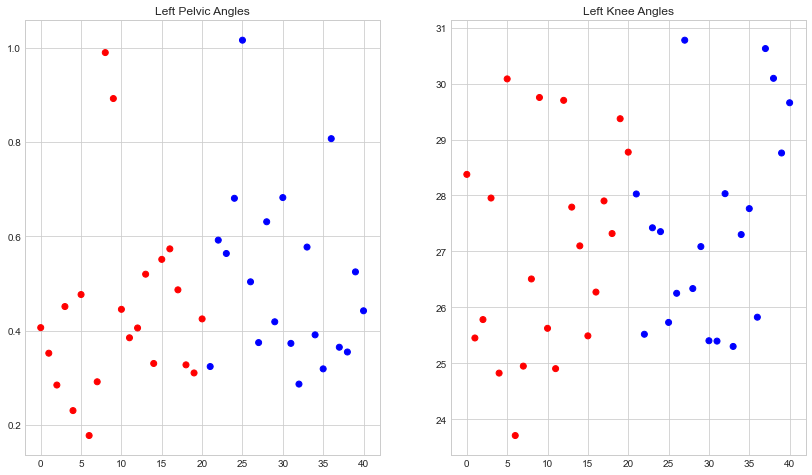

In [28]:
fig,ax = plt.subplots(1,2,figsize = (14,8))
#, c=data4["injury level"]
color = ["r" if i == 0 else "b" for i in injurylevel]

ax[0].scatter(np.arange(0,41),data4["Left Pelvic Angles"], c=color)
ax[0].set_title("Left Pelvic Angles")

ax[1].scatter(np.arange(0,41),data4["Left Knee Angles"], c=color)
ax[1].set_title("Left Knee Angles")